<a href="https://colab.research.google.com/github/chill-br/ajay/blob/main/codsoft_task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
# Load the dataset
df = pd.read_csv('/content/test.csv',encoding='latin-1')

# Display the first few rows of the dataset
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [39]:
columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns=columns_to_drop, inplace=True)

In [40]:
new_column_names = {"v1":"Category","v2":"Message"}
df.rename(columns = new_column_names,inplace = True)


In [41]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


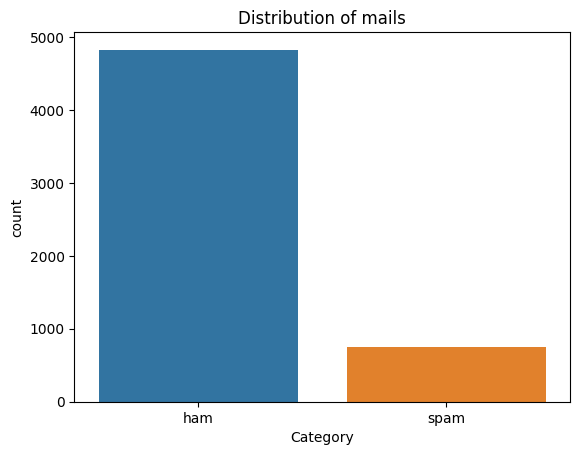

In [42]:
sns.countplot(data=df, x='Category')
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.show()

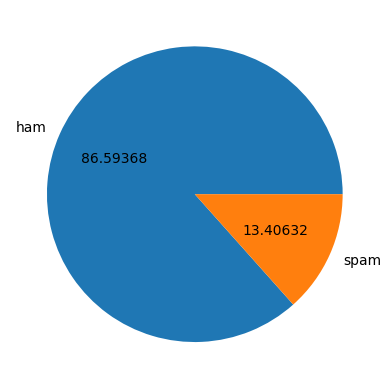

In [43]:
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct='%0.5f')
plt.show()

In [44]:
df.loc[df["Category"] == "spam", "Category"] = 0
df.loc[df["Category"] == "ham", "Category"] = 1

In [45]:
X = df["Message"]
Y = df["Category"]
print(X)
print(Y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object
0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [47]:
print(X.shape)

(5572,)


In [48]:
print(X_train.shape)
print(X_test.shape)

(4457,)
(1115,)


In [49]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [50]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)


In [51]:
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")

In [52]:
print(X_train)
print(X_train_features)

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: Message, Length: 4457, dtype: object
  (0, 741)	0.3219352588930141
  (0, 3979)	0.2410582143632299
  (0, 4296)	0.3891385935794867
  (0, 6599)	0.20296878731699391
  (0, 3386)	0.3219352588930141
  (0, 2122)	0.38613577623520473
  (0, 3136)	0.440116181574609
  (0, 3262)	0.25877035357606315
  (0, 3380)	0.21807195185332803
  (0, 4513)	0.2909649098524696
  (1, 4

In [53]:
model = LogisticRegression()
model.fit(X_train_features, Y_train)


LogisticRegression()

In [54]:
predict_train_data=model.predict(X_train_features)

In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_train_data=accuracy_score(Y_train,predict_train_data)
print("Accuracy on training data: ",accuracy_train_data)

Accuracy on training data:  0.9661207089970832


In [56]:
predict_test_data=model.predict(X_test_features)

In [57]:
accuracy_test_data=accuracy_score(Y_test,predict_test_data)
print("acuuracy on test data: ",accuracy_test_data)

acuuracy on test data:  0.9623318385650225


In [58]:
new_mail=["Congratulations on your recent achievement! Well done."]
new_data_features=feature_extraction.transform(new_mail)
prediction=model.predict(new_data_features)
print(prediction)

if(prediction[0]==1):
    print("Ham Mail")
else:
    print("Spam Mail")

[1]
Ham Mail


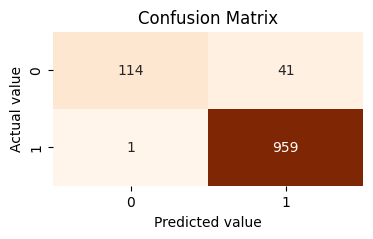

In [59]:
conf_matrix=confusion_matrix(Y_test,predict_test_data)
plt.figure(figsize=(4,2))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()

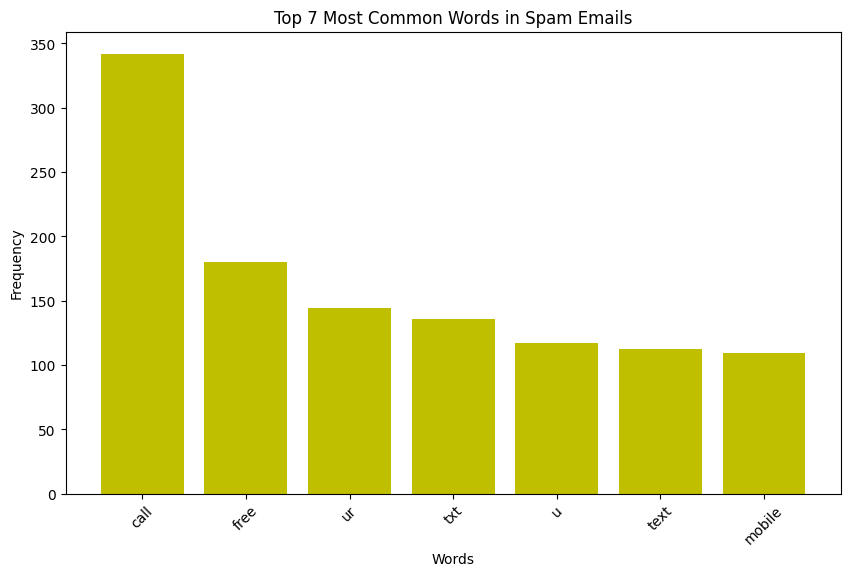

In [60]:
stop_words = set(stopwords.words('english'))
spam_words = " ".join(df[df['Category'] == 0]['Message']).split()
ham_words = " ".join(df[df['Category'] == 1]['Message']).split()

spam_word_freq = Counter([word.lower() for word in spam_words if word.lower() not in stop_words and word.isalpha()])

plt.figure(figsize=(10, 6))
plt.bar(*zip(*spam_word_freq.most_common(7)), color='y')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 7 Most Common Words in Spam Emails')
plt.xticks(rotation=45)
plt.show()